In [2]:
## Traffic_Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Traffic_Data.csv')
data.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


### 1 .Understanding the traffic density on various days of the week in the urban environments. [ 20 MARKS ] 
- the average traffic density by day of week provides a summary of the typical traffic patterns across a week.

C:\Users\Hello\AppData\Local\Temp\ipykernel_10612\1339365310.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  traffic_density_by_day = data.groupby("Day Of Week")["Traffic Density"].mean()


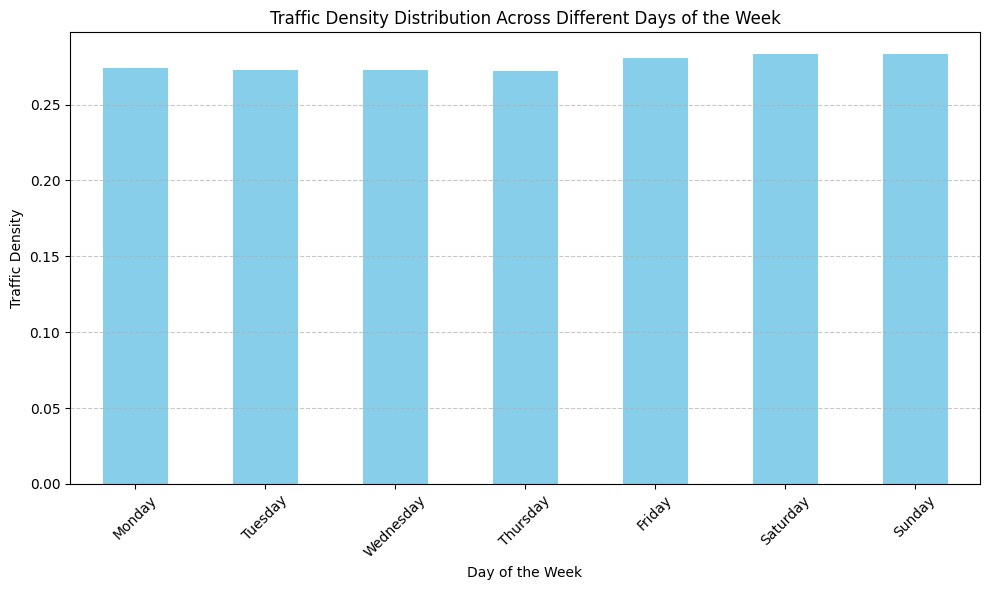

In [4]:

# Convert "Day Of Week" column to categorical to maintain order
data["Day Of Week"] = pd.Categorical(data["Day Of Week"], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

# Group by day of the week and calculate mean traffic density
traffic_density_by_day = data.groupby("Day Of Week")["Traffic Density"].mean()

# Plot the traffic density distribution across different days of the week
plt.figure(figsize=(10, 6))
traffic_density_by_day.plot(kind="bar", color="skyblue")
plt.title("Traffic Density Distribution Across Different Days of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Traffic Density")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

from the results we can see that ....

### 2.Analyzing the impact of various factors like weather, economic conditions, and vehicle types on traffic density and energy consumption. [ 10 MARKS ]

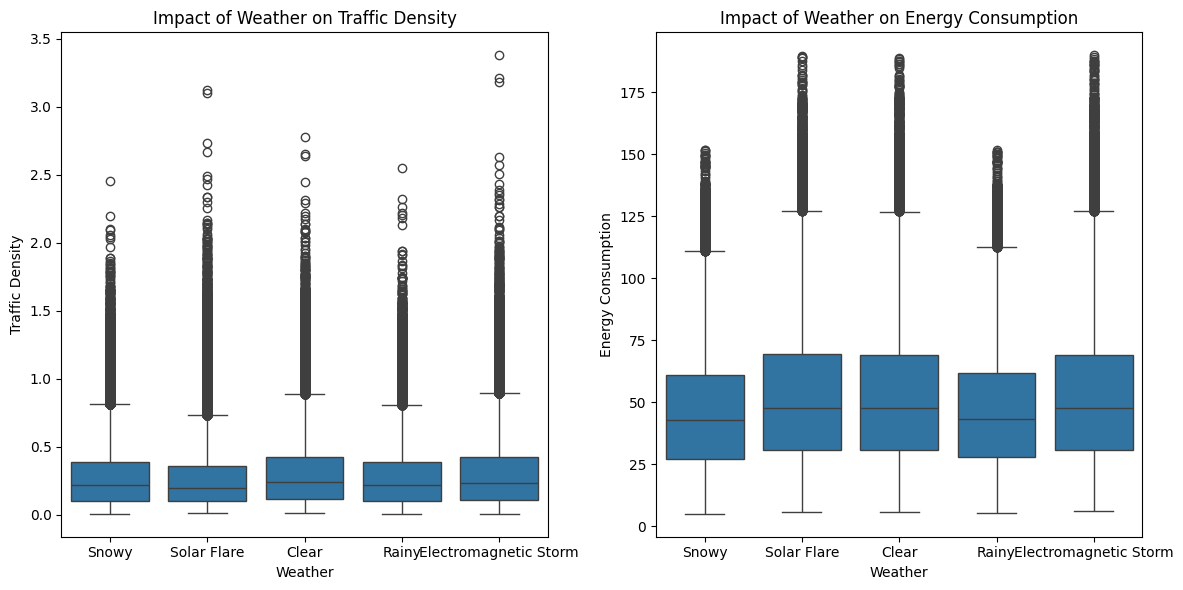

In [5]:
# Analyzing the impact of weather on traffic density and energy consumption
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="Weather", y="Traffic Density", data=data)
plt.title("Impact of Weather on Traffic Density")

plt.subplot(1, 2, 2)
sns.boxplot(x="Weather", y="Energy Consumption", data=data)
plt.title("Impact of Weather on Energy Consumption")
plt.tight_layout()
plt.show()

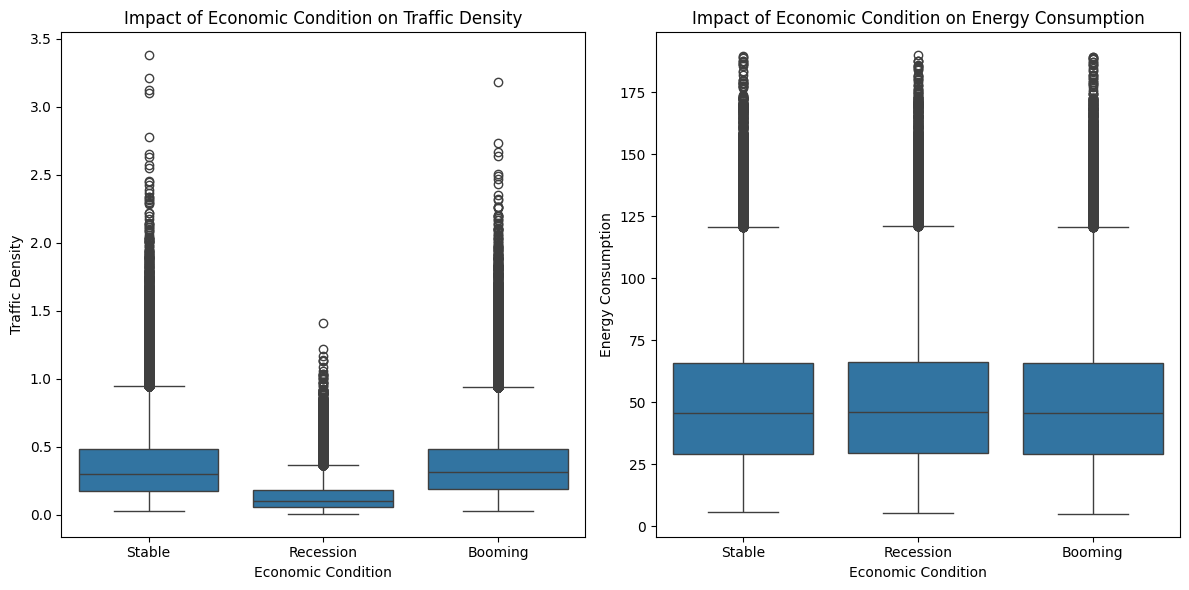

In [6]:
# Analyzing the impact of economic conditions on traffic density and energy consumption
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="Economic Condition", y="Traffic Density", data=data)
plt.title("Impact of Economic Condition on Traffic Density")

plt.subplot(1, 2, 2)
sns.boxplot(x="Economic Condition", y="Energy Consumption", data=data)
plt.title("Impact of Economic Condition on Energy Consumption")
plt.tight_layout()
plt.show()

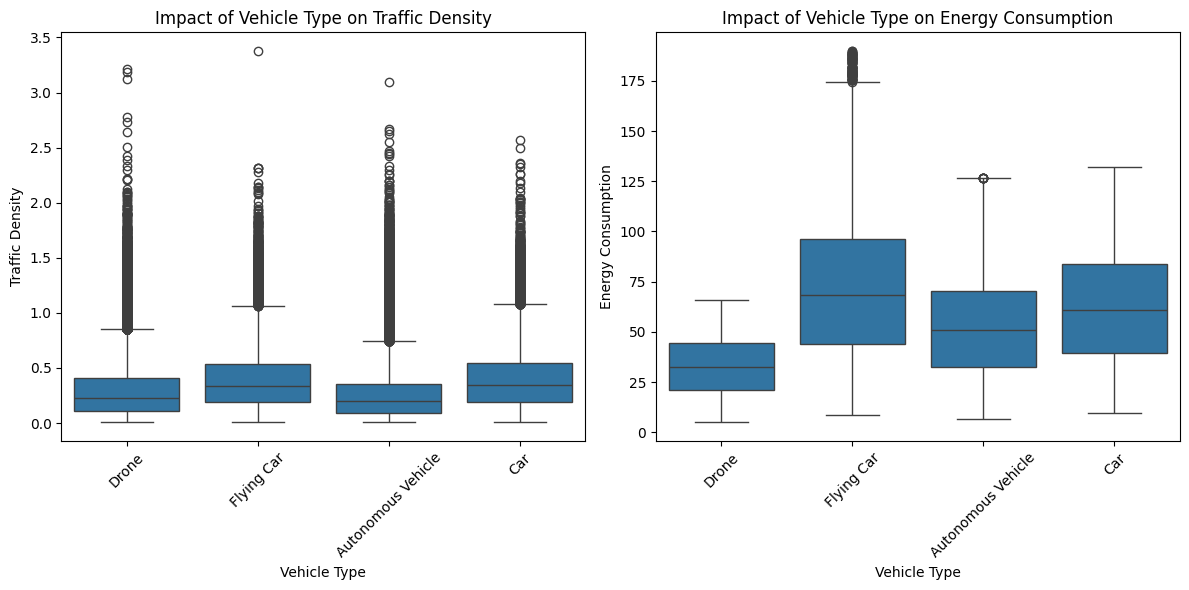

In [8]:
# Analyzing the impact of vehicle types on traffic density and energy consumption
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="Vehicle Type", y="Traffic Density", data=data)
plt.title("Impact of Vehicle Type on Traffic Density")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x="Vehicle Type", y="Energy Consumption", data=data)
plt.title("Impact of Vehicle Type on Energy Consumption")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Hello\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


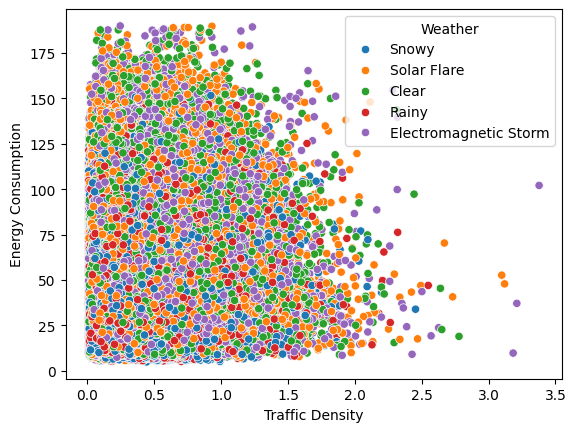

In [10]:
sns.scatterplot(data=data, x='Traffic Density', y='Energy Consumption', hue='Weather')
plt.show()

In [12]:

booming_data = data[data['Economic Condition'] == 'Booming']
recession_data = data[data['Economic Condition'] == 'Recession']


print(f"Average Traffic Density during Booming: {booming_data['Traffic Density'].mean()}")
print(f"Average Traffic Density during Recession: {recession_data['Traffic Density'].mean()}")


Average Traffic Density during Booming: 0.35461461429512836
Average Traffic Density during Recession: 0.12939125982915653


In [ ]:
df = pd.DataFrame(data)

# Select features and target variable
features = ["Hour Of Day", "Speed", "Is Peak Hour", "Energy Consumption"]
target = "Traffic Density"

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Traffic Density")
plt.ylabel("Predicted Traffic Density")
plt.title("Actual vs. Predicted Traffic Density")
plt.show()